# KNN w/o scikit

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = [  
#  weight,sweetness,label          
    (180, 7, 'Apple'),
    (200, 6, 'Apple'),
    (150, 4, 'Orange'),
    (170, 5, 'Orange'),
    (160, 6, 'Apple'),
    (140, 3, 'Orange')
]

In [42]:
data

[(180, 7, 'Apple'),
 (200, 6, 'Apple'),
 (150, 4, 'Orange'),
 (170, 5, 'Orange'),
 (160, 6, 'Apple'),
 (140, 3, 'Orange')]

In [43]:
new_fruit = (165,5.5)

In [44]:
def euclidean_distance(fruit1 , fruit2):
    return np.sqrt((fruit1[0] - fruit2[0]) **2 +  (fruit1[1] - fruit2[1]) **2)


In [77]:
def manhattan_distance(fruit1, fruit2):
    return sum(abs(a - b) for a, b in zip(fruit1, fruit2))


In [46]:
def minkowski_distance(fruit1 , fruit2 , p):
    return sum(abs(a - b) ** p for a, b in zip(fruit1, fruit2)) ** (1 / p)

In [78]:
def knn_classify(new_fruit,data,k):
    distances = []
    for weight,sweetness,label in data:
        dist = euclidean_distance(new_fruit,(weight,sweetness))
        distances.append((dist,label))
        
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    
    vote_count = {}
    
    for neighbor in nearest_neighbors:
        label = neighbor[1]
        if label in vote_count:
            vote_count[label] += 1  
        else:
            vote_count[label] = 1

    predicted_label = max(vote_count, key=vote_count.get)
    return predicted_label

In [79]:
for k in [1 , 3 , 5]:
    predicted_label_k = knn_classify(new_fruit,data,k)
    print(f'New Fruit for k = {k} is {predicted_label_k}')

New Fruit for k = 1 is Orange
New Fruit for k = 3 is Apple
New Fruit for k = 5 is Orange


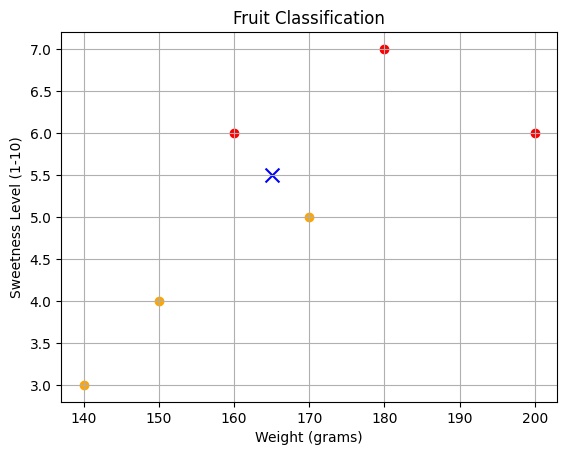

In [75]:
def plot(data,new_fruit):
    plt.figure()
    for weight,sweetness,label in data:
        color = 'red' if label == 'Apple' else 'orange'
        plt.scatter(weight , sweetness , color = color)
    
    plt.title('Fruit Classification')
    plt.xlabel('Weight (grams)')
    plt.ylabel('Sweetness Level (1-10)')
    
    plt.scatter(new_fruit[0],new_fruit[1], color ='blue',marker='x',s=100,label = 'New Fruit')
    # plt.legend(['Apple', 'Orange', 'New Fruit'])
    plt.grid()
    plt.show()

plot(data, new_fruit)

In [80]:
data = [
    (180, 7, 'Apple'),
    (200, 6, 'Apple'),
    (150, 4, 'Orange'),
    (170, 5, 'Orange'),
    (160, 6, 'Apple'),
    (140, 3, 'Orange')
]

new_fruit = (165, 5.5)

In [81]:
def knn_classify(new_fruit, data, k, distance_func, p=None):
    distances = []
    for weight, sweetness, label in data:
        if p:  # For Minkowski distance when p is specified
            dist = distance_func(new_fruit, (weight, sweetness), p)
        else:
            dist = distance_func(new_fruit, (weight, sweetness))
        
        distances.append((dist, label))
        
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    
    vote_count = {}
    for neighbor in nearest_neighbors:
        label = neighbor[1]
        if label in vote_count:
            vote_count[label] += 1  
        else:
            vote_count[label] = 1

    predicted_label = max(vote_count, key=vote_count.get)
    
    # Displaying distances
    print(f"\nDistances for {distance_func.__name__} (k={k}):")
    print([round(dist[0], 2) for dist in distances])
    
    return predicted_label

In [82]:
for k in [1, 3, 5]:
    # Euclidean
    print(f"\nClassification result using Euclidean distance (k={k}):")
    print(knn_classify(new_fruit, data, k, minkowski_distance, p=2))

    # Manhattan
    print(f"\nClassification result using Manhattan distance (k={k}):")
    print(knn_classify(new_fruit, data, k, manhattan_distance))

    # Minkowski (p=3)
    print(f"\nClassification result using Minkowski distance (p=3, k={k}):")
    print(knn_classify(new_fruit, data, k, minkowski_distance, p=3))


Classification result using Euclidean distance (k=1):

Distances for minkowski_distance (k=1):
[5.02, 5.02, 15.07, 15.07, 25.12, 35.0]
Orange

Classification result using Manhattan distance (k=1):

Distances for manhattan_distance (k=1):
[5.5, 5.5, 16.5, 16.5, 27.5, 35.5]
Orange

Classification result using Minkowski distance (p=3, k=1):

Distances for minkowski_distance (k=1):
[5.0, 5.0, 15.0, 15.0, 25.01, 35.0]
Orange

Classification result using Euclidean distance (k=3):

Distances for minkowski_distance (k=3):
[5.02, 5.02, 15.07, 15.07, 25.12, 35.0]
Apple

Classification result using Manhattan distance (k=3):

Distances for manhattan_distance (k=3):
[5.5, 5.5, 16.5, 16.5, 27.5, 35.5]
Apple

Classification result using Minkowski distance (p=3, k=3):

Distances for minkowski_distance (k=3):
[5.0, 5.0, 15.0, 15.0, 25.01, 35.0]
Apple

Classification result using Euclidean distance (k=5):

Distances for minkowski_distance (k=5):
[5.02, 5.02, 15.07, 15.07, 25.12, 35.0]
Orange

Classific

# OR

In [6]:
import pandas as pd

df = pd.read_csv('fruits.csv')

def euclid(x, y):
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) ** 0.5

def manhatten(x, y):
    return abs(x[0] - y[0]) + abs(x[1] - y[1])

def minkowski(x, y, k):
    return ((x[0] - y[0]) ** k + (x[1] - y[1]) ** k) ** (1 / k)

n_weight = 165
n_sweet = 5.5
k = 3

# note how the function is applied to the entire dataframe
df['distance'] = euclid((df['weight'], df['sweetness level']), (165, 5.5))

# to sort values use sort_values here; don't forget about the 'by' and 'ascending' parameters
df = df.sort_values(by='distance', ascending= True)
print(df)

# keep k enteries; in pandas slicing includes the last element as well
enteries = min(k, len(df))
print(df.iloc[: enteries])

# note how value counts is used
counts = df.iloc[:enteries, ].value_counts('label')
print(counts)

# use idxmax for the answer
print(counts.idxmax())

   weight  sweetness level   label   distance
3     170                5  Orange   5.024938
4     160                6   Apple   5.024938
2     150                4  Orange  15.074813
0     180                7   Apple  15.074813
5     140                3  Orange  25.124689
1     200                6   Apple  35.003571
   weight  sweetness level   label   distance
3     170                5  Orange   5.024938
4     160                6   Apple   5.024938
2     150                4  Orange  15.074813
label
Orange    2
Apple     1
Name: count, dtype: int64
Orange
